In [1]:
from utils.query_db import db_connection
from IPython.display import Image

### **`GROUP BY`** clause

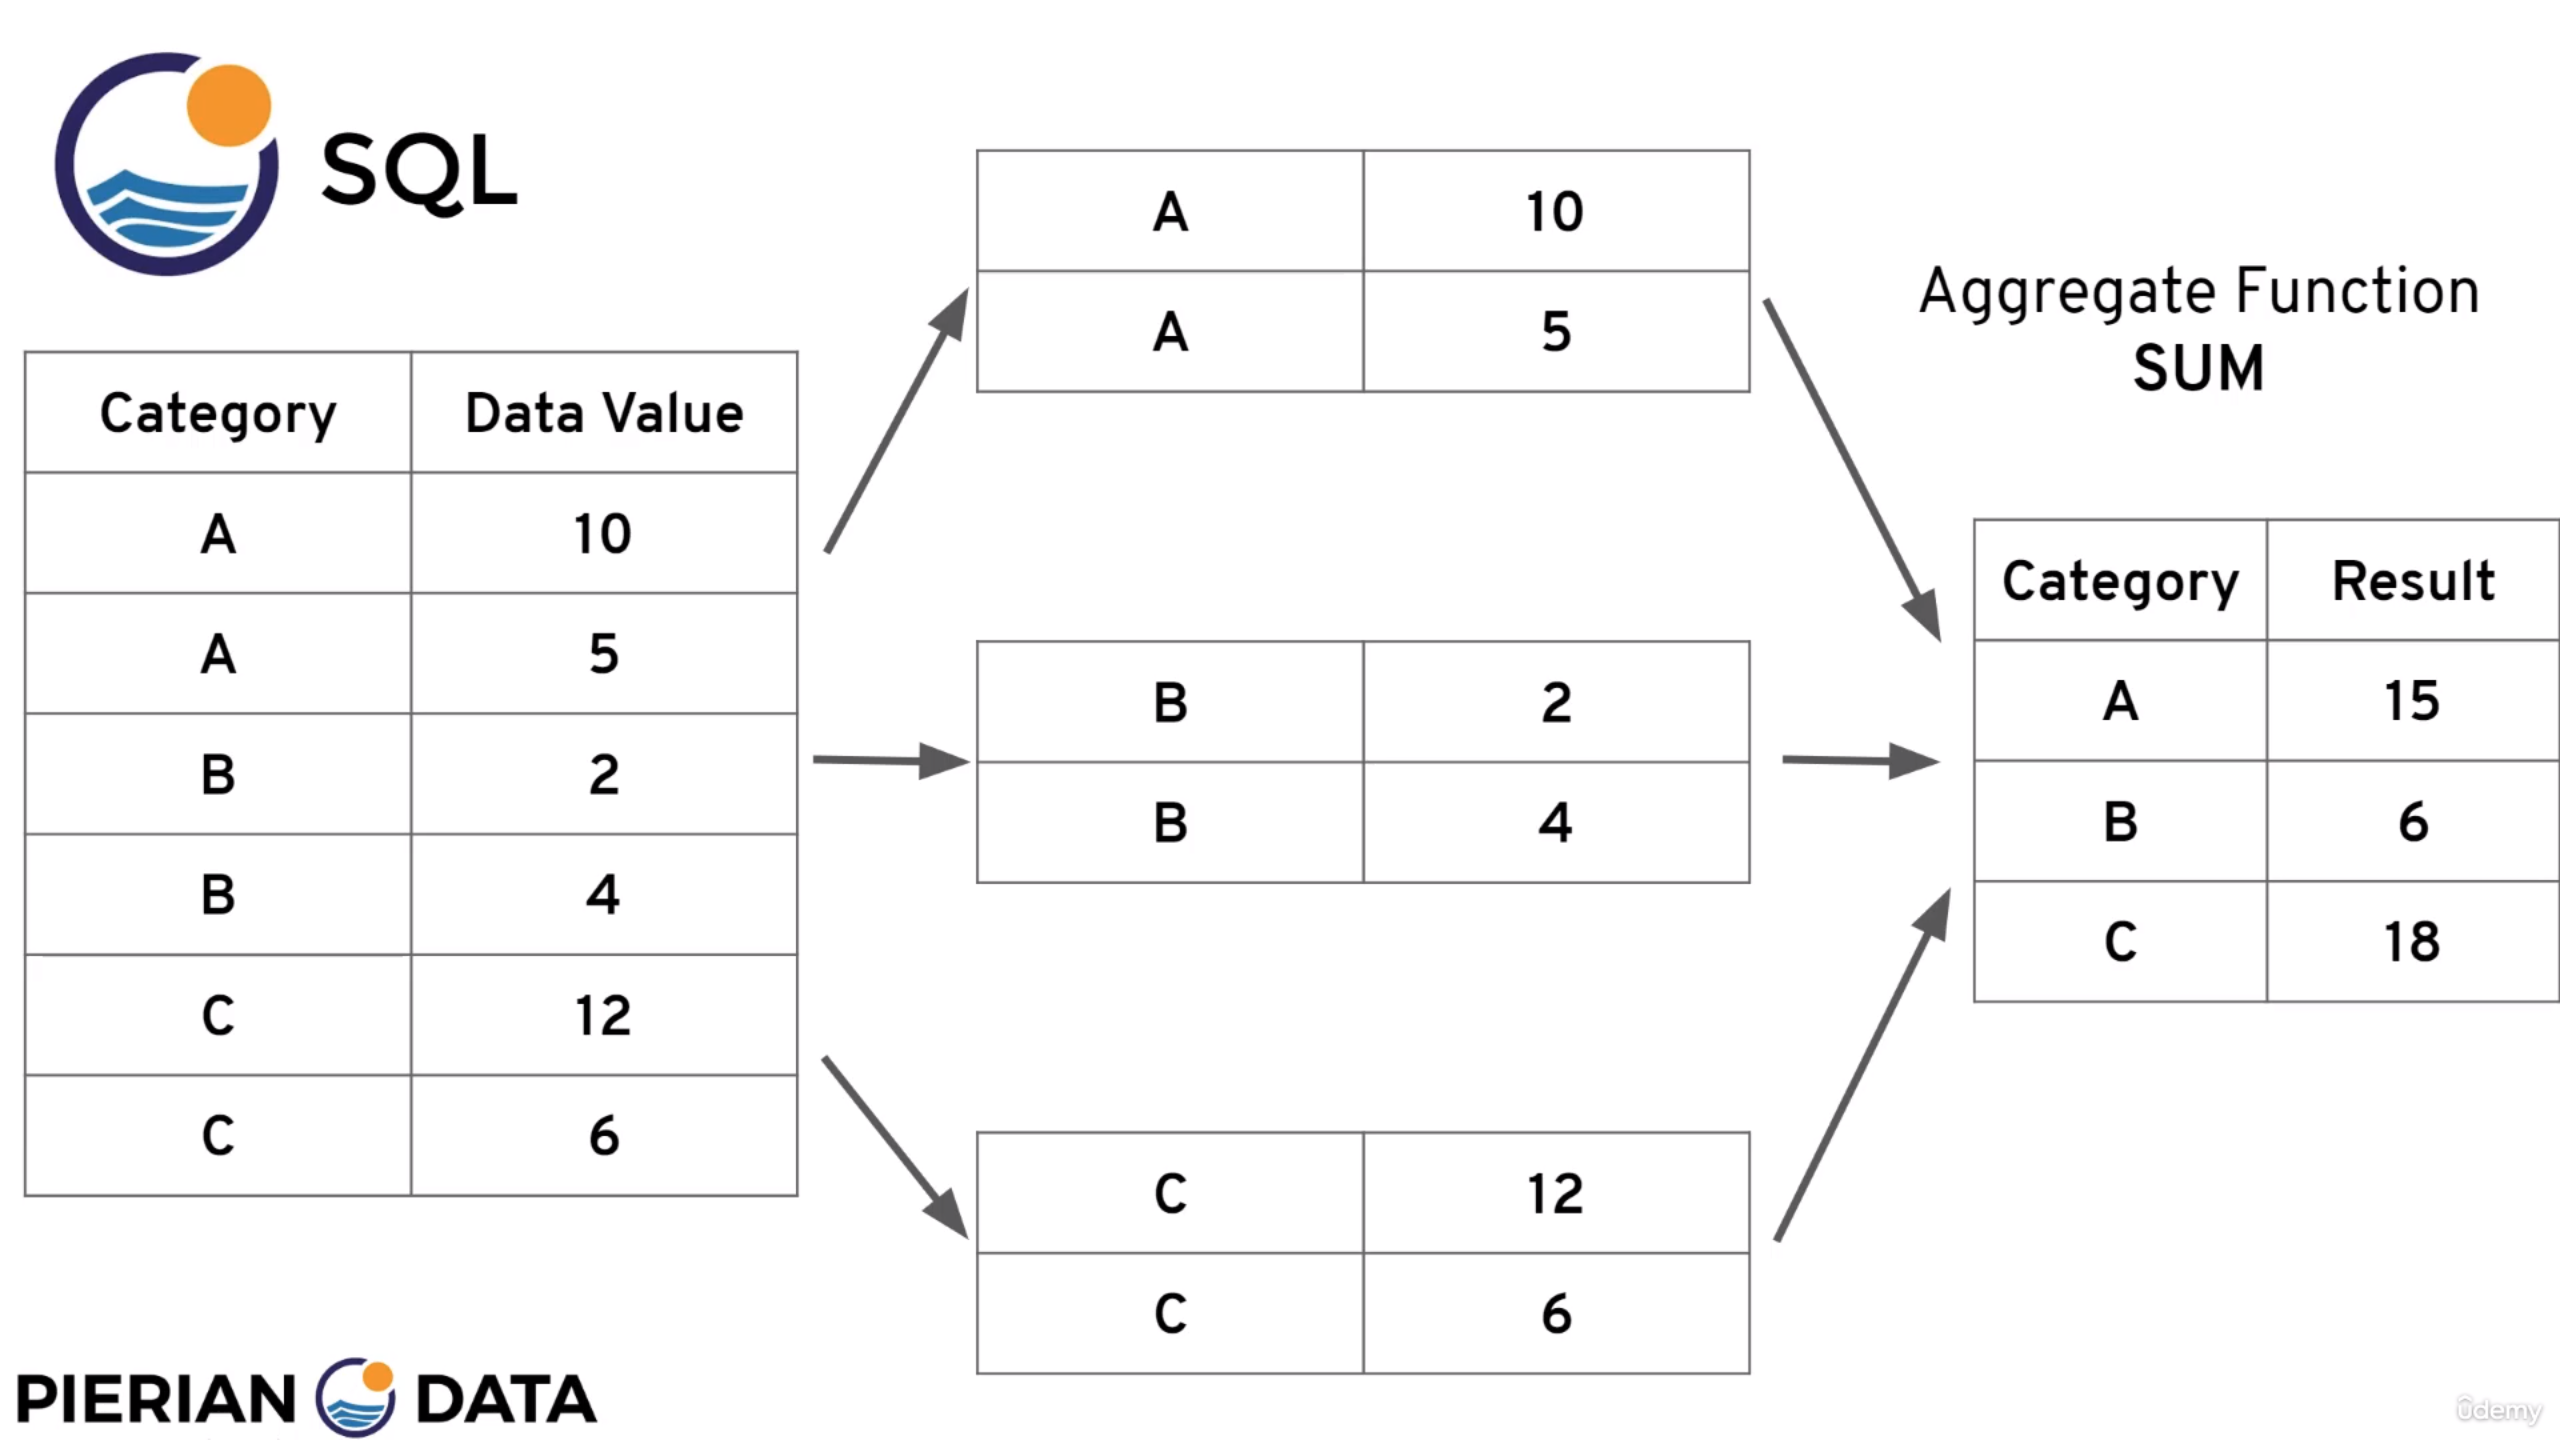

In [2]:
Image(filename="../images/GROUP BY and aggregate func example.png")

**`GROUP BY`** must appear right after a **`FROM`** or a **`WHERE`** clause, therefore it is possible to filter data with a **`WHERE`** clause before grouping it by a category.

In the **`SELECT`** statement, columns must either have an aggregate function or be in the **`GROUP BY`**  call. 

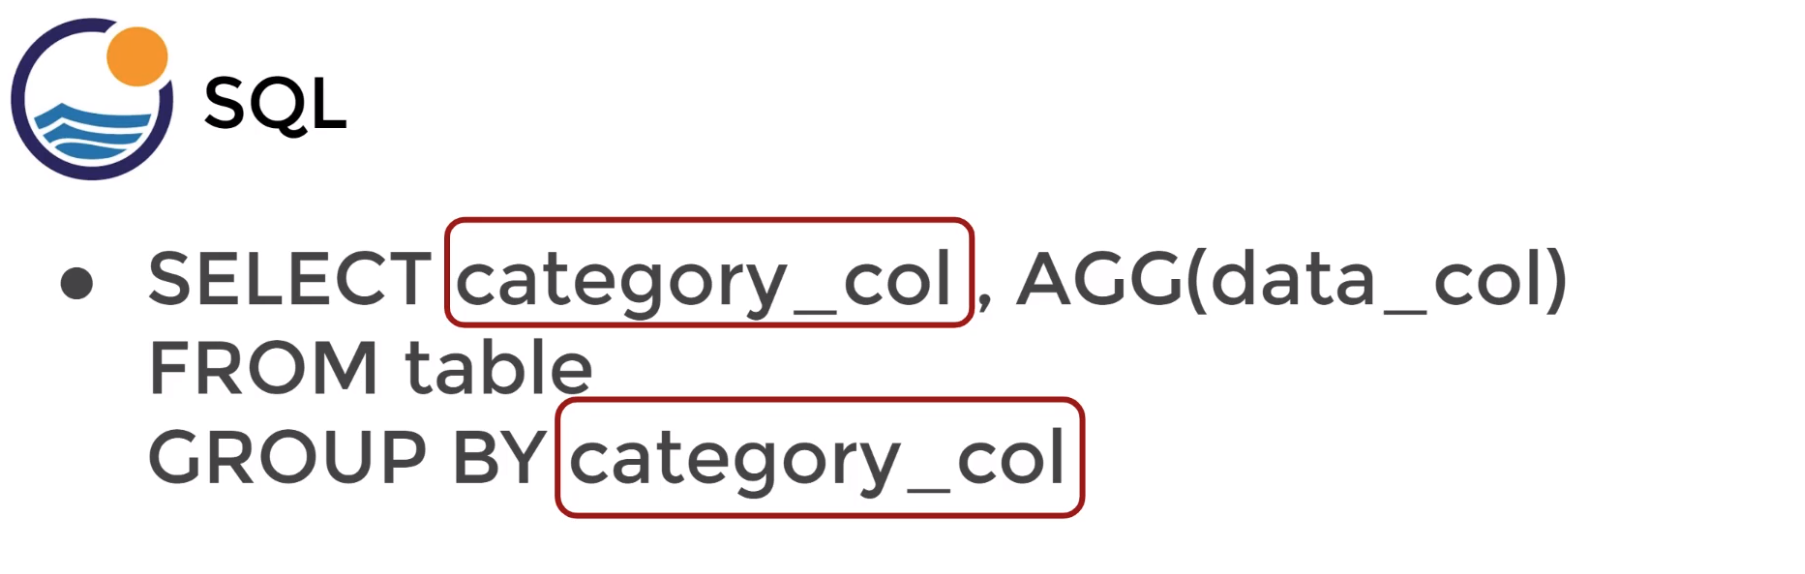

In [3]:
Image(filename="../images/GROUP BY clarification 1.png")

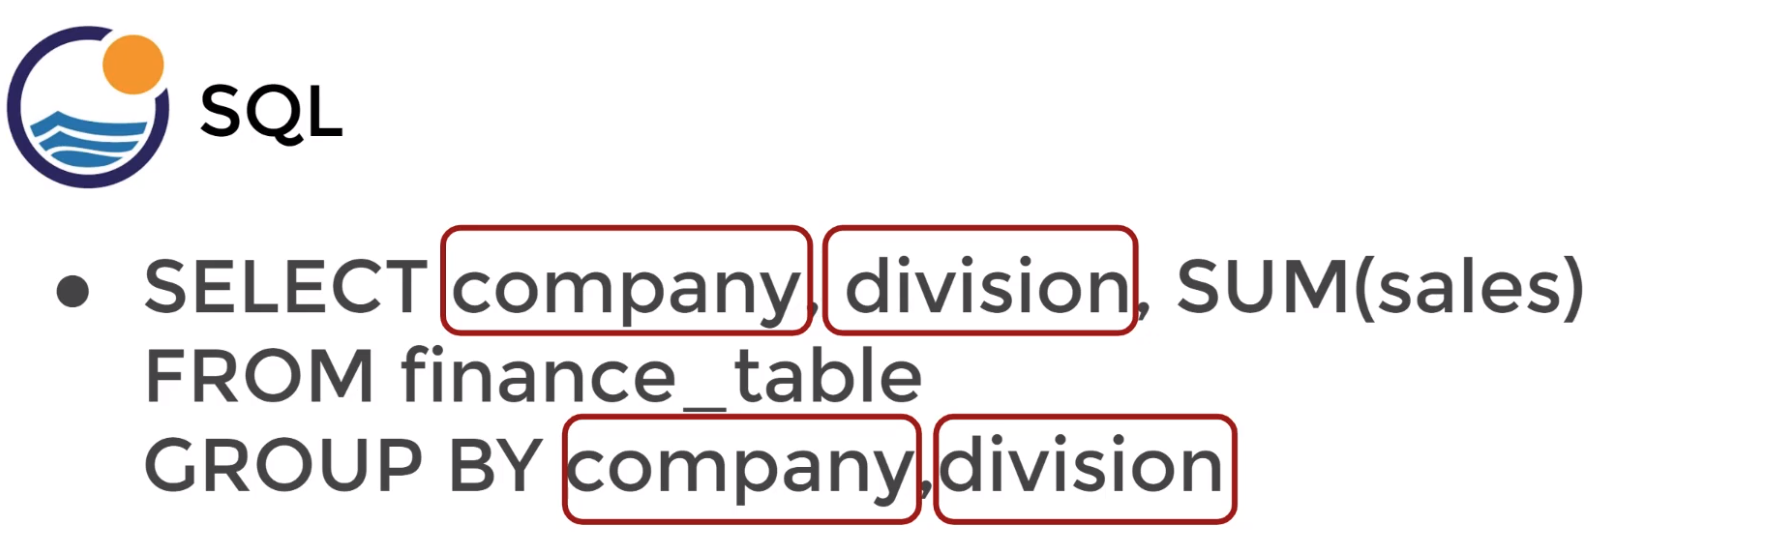

In [4]:
Image(filename="../images/GROUP BY clarification 2.png")

In [5]:
with db_connection() as conn:
    conn.fetch_all("""SELECT customer_id, 
                             SUM(amount) AS amount_spend,
                             COUNT(amount) AS num_payments
                      FROM payment
                      GROUP BY customer_id
                      ORDER BY amount_spend DESC;""")

,customer_id,amount_spend,num_payments
0,148,211.55,45
1,526,208.58,42
2,178,194.61,39
3,137,191.62,38
4,144,189.60,40
...,...,...,...
594,110,49.88,12
595,320,47.85,15
596,248,37.87,13
597,281,32.90,10


In [6]:
with db_connection() as conn:
    conn.fetch_all("""SELECT customer_id,
                             staff_id,
                             SUM(amount) AS amount_spend,
                             COUNT(amount) AS num_payments
                      FROM payment
                      GROUP BY staff_id, 
                               customer_id
                      ORDER BY customer_id ASC,
                               staff_id ASC;""")

,customer_id,staff_id,amount_spend,num_payments
0,1,1,60.85,15
1,1,2,53.85,15
2,2,1,55.86,14
3,2,2,67.88,12
4,3,1,59.88,12
...,...,...,...,...
1193,597,2,37.91,9
1194,598,1,43.90,10
1195,598,2,39.88,12
1196,599,1,28.92,8


You can also use **`GROUP BY`** with datetime columns by using a **`DATE`** function.

In [7]:
with db_connection() as conn:
    conn.fetch_all("""SELECT DATE(payment_date) AS date,
                             SUM(amount) AS amount_processed,
                             COUNT(amount) AS num_payments
                      FROM payment
                      GROUP BY date
                      ORDER BY date ASC;""")

,date,amount_processed,num_payments
0,2007-02-14,116.73,27
1,2007-02-15,1188.92,308
2,2007-02-16,1154.18,282
3,2007-02-17,1188.17,283
4,2007-02-18,1275.98,302
5,2007-02-19,1290.90,310
6,2007-02-20,1219.09,291
7,2007-02-21,917.87,213
8,2007-03-01,2808.24,676
9,2007-03-02,2550.05,595


#### **`GROUP BY`** challenge

In [8]:
with db_connection() as conn:
    conn.fetch_all("""SELECT staff_id,
                             COUNT(payment_id) AS payments_processed
                      FROM payment
                      GROUP BY staff_id
                      ORDER BY payments_processed DESC;""")

,staff_id,payments_processed
0,2,7304
1,1,7292


In [9]:
with db_connection() as conn:
    conn.fetch_all("""SELECT rating,
                             ROUND(AVG(replacement_cost), 2) AS avg_replacement_cost
                      FROM film
                      GROUP BY rating
                      ORDER BY avg_replacement_cost ASC;""")

,rating,avg_replacement_cost
0,PG,18.96
1,G,20.12
2,NC-17,20.14
3,R,20.23
4,PG-13,20.40


In [10]:
with db_connection() as conn:
    conn.fetch_all("""SELECT customer_id,
                             SUM(amount) AS total_paid
                      FROM payment
                      GROUP BY customer_id
                      ORDER BY total_paid DESC
                      LIMIT 5;""")

,customer_id,total_paid
0,148,211.55
1,526,208.58
2,178,194.61
3,137,191.62
4,144,189.60
